In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
cwd = os.getcwd()
#read excel using pandas
ls_df = pd.read_csv(cwd + r"\rs_r1.csv")

In [3]:
#Gives info about entire dataframe
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Reservoir      1709 non-null   object 
 1   Site ID        1709 non-null   object 
 2   Lat            1709 non-null   float64
 3   Long           1709 non-null   float64
 4   Sampling Date  1709 non-null   object 
 5   Chlo-a         1709 non-null   float64
 6   Turbidity      1709 non-null   float64
 7   B1             1709 non-null   float64
 8   B2             1709 non-null   float64
 9   B3             1709 non-null   float64
 10  B4             1709 non-null   float64
 11  B5             1709 non-null   float64
 12  B6             1709 non-null   float64
 13  B7             1709 non-null   float64
 14  B8             1709 non-null   float64
 15  B9             1709 non-null   float64
 16  B10            1709 non-null   float64
 17  B11            1709 non-null   float64
 18  B12     

In [4]:
# #Drop null values if there are any
ls_df = ls_df.dropna()
# #After dropping null values checking the dataframe again
ls_df.isnull().sum()

Reservoir        0
Site ID          0
Lat              0
Long             0
Sampling Date    0
Chlo-a           0
Turbidity        0
B1               0
B2               0
B3               0
B4               0
B5               0
B6               0
B7               0
B8               0
B9               0
B10              0
B11              0
B12              0
B13              0
B14              0
B15              0
B16              0
B17              0
B18              0
B19              0
dtype: int64

In [5]:
#creating a new dataframe to drop columns
dc = pd.DataFrame()

#dropped unnencessary columns for regression
dc = ls_df.drop(columns = ["Reservoir","Site ID", "Lat", "Long", "Sampling Date", ], axis = 1)

dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709 entries, 0 to 1708
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chlo-a     1709 non-null   float64
 1   Turbidity  1709 non-null   float64
 2   B1         1709 non-null   float64
 3   B2         1709 non-null   float64
 4   B3         1709 non-null   float64
 5   B4         1709 non-null   float64
 6   B5         1709 non-null   float64
 7   B6         1709 non-null   float64
 8   B7         1709 non-null   float64
 9   B8         1709 non-null   float64
 10  B9         1709 non-null   float64
 11  B10        1709 non-null   float64
 12  B11        1709 non-null   float64
 13  B12        1709 non-null   float64
 14  B13        1709 non-null   float64
 15  B14        1709 non-null   float64
 16  B15        1709 non-null   float64
 17  B16        1709 non-null   float64
 18  B17        1709 non-null   float64
 19  B18        1709 non-null   float64
 20  B19     

In [6]:
dc = dc.where(dc["Turbidity"] > 0)
dc = dc.where(dc["Turbidity"] <150)
dc = dc.where(dc["B1"] < 15000)

In [7]:
dc = dc.dropna()
dc.head()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,6.8,38.6,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
1,7.8,40.3,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
2,7.0,41.5,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
3,6.5,42.4,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
4,7.1,5.1,7506.0,8101.0,9326.0,8949.0,9330.0,8644.0,8249.0,224.0,...,5345.0,19.0,1759.0,9880.0,0.0,594.0,9174.0,3964.0,21952.0,0.0


In [8]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1708
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chlo-a     1378 non-null   float64
 1   Turbidity  1378 non-null   float64
 2   B1         1378 non-null   float64
 3   B2         1378 non-null   float64
 4   B3         1378 non-null   float64
 5   B4         1378 non-null   float64
 6   B5         1378 non-null   float64
 7   B6         1378 non-null   float64
 8   B7         1378 non-null   float64
 9   B8         1378 non-null   float64
 10  B9         1378 non-null   float64
 11  B10        1378 non-null   float64
 12  B11        1378 non-null   float64
 13  B12        1378 non-null   float64
 14  B13        1378 non-null   float64
 15  B14        1378 non-null   float64
 16  B15        1378 non-null   float64
 17  B16        1378 non-null   float64
 18  B17        1378 non-null   float64
 19  B18        1378 non-null   float64
 20  B19     

In [9]:
dc.describe()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,...,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.0
mean,13.362119,8.202250,7557.744557,7818.526851,8438.772859,8141.233672,8036.430334,7728.995646,7611.920900,142.962264,...,6772.938316,137.928157,1212.065312,9884.046444,45.073295,420.605225,8954.436139,2616.521771,22171.201742,0.0
std,11.063869,12.289212,873.526906,695.603868,618.081259,705.119407,842.533885,514.987624,362.495925,55.912059,...,1287.614842,205.979834,504.551849,39.794653,49.269755,129.737373,639.463081,1171.356627,2372.707727,0.0
min,-99.900000,0.100000,0.000000,2724.000000,6543.000000,6244.000000,6517.000000,7237.000000,7293.000000,64.000000,...,4840.000000,0.000000,158.000000,9606.000000,0.000000,205.000000,7042.000000,275.000000,21824.000000,0.0
25%,6.200000,1.600000,7312.000000,7551.000000,8073.000000,7729.000000,7572.000000,7435.250000,7403.000000,96.000000,...,6100.000000,21.500000,646.000000,9880.000000,0.000000,336.000000,8463.000000,1283.250000,21952.000000,0.0
50%,11.050000,3.700000,7723.500000,7865.000000,8324.000000,7986.000000,7783.000000,7565.000000,7471.000000,128.000000,...,6370.000000,57.000000,1406.000000,9880.000000,0.000000,395.000000,9227.500000,3023.000000,21952.000000,0.0
75%,19.100000,8.600000,7988.000000,8139.000000,8721.000000,8373.000000,8246.000000,7838.000000,7713.000000,216.000000,...,8233.750000,129.000000,1460.000000,9904.000000,84.000000,531.000000,9432.000000,3187.000000,21952.000000,0.0
max,122.200000,116.800000,9847.000000,10280.000000,11413.000000,11265.000000,12906.000000,11506.000000,10031.000000,228.000000,...,9492.000000,1267.000000,1920.000000,9904.000000,139.000000,712.000000,9756.000000,4364.000000,55052.000000,0.0


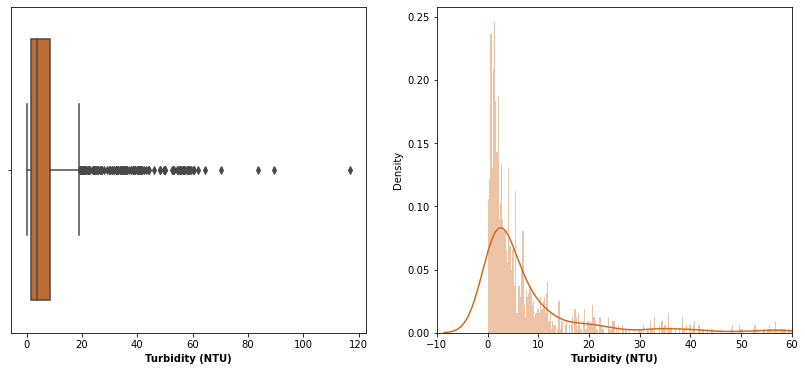

In [10]:
#Turbidity distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
ax1 = sns.boxplot(dc["Turbidity"], color = 'chocolate')
plt.subplot(122)
ax2 = sns.distplot(dc["Turbidity"], bins=500, color = 'chocolate')
ax1.set_xlabel("Turbidity (NTU)", fontweight = 'bold')
ax2.set_xlabel("Turbidity (NTU)", fontweight = 'bold')
ax2.set_xlim(-10,60)
#plt.savefig("turb_dist.tif", dpi = 300)
plt.show()

mu=1.328334878137891, sigma=1.2595452574030785


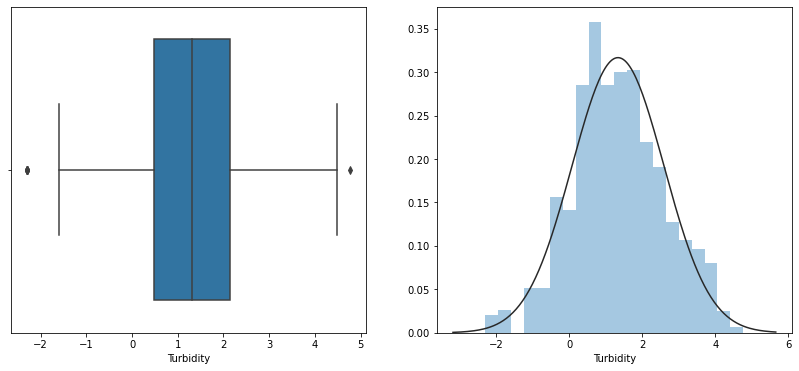

In [11]:
#chlorphyll distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(np.log(dc["Turbidity"]))
plt.subplot(122)
sns.distplot(np.log(dc["Turbidity"]), bins=20, fit=stats.norm, kde=False)
# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(np.log(dc["Turbidity"]))
print("mu={0}, sigma={1}".format(mu, sigma))
plt.show()

In [12]:
df = dc.copy()
df["Turbidity"] = np.log(dc["Turbidity"])
df.head()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,6.8,3.653252,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
1,7.8,3.696351,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
2,7.0,3.725693,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
3,6.5,3.747148,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
4,7.1,1.629241,7506.0,8101.0,9326.0,8949.0,9330.0,8644.0,8249.0,224.0,...,5345.0,19.0,1759.0,9880.0,0.0,594.0,9174.0,3964.0,21952.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1708
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chlo-a     1378 non-null   float64
 1   Turbidity  1378 non-null   float64
 2   B1         1378 non-null   float64
 3   B2         1378 non-null   float64
 4   B3         1378 non-null   float64
 5   B4         1378 non-null   float64
 6   B5         1378 non-null   float64
 7   B6         1378 non-null   float64
 8   B7         1378 non-null   float64
 9   B8         1378 non-null   float64
 10  B9         1378 non-null   float64
 11  B10        1378 non-null   float64
 12  B11        1378 non-null   float64
 13  B12        1378 non-null   float64
 14  B13        1378 non-null   float64
 15  B14        1378 non-null   float64
 16  B15        1378 non-null   float64
 17  B16        1378 non-null   float64
 18  B17        1378 non-null   float64
 19  B18        1378 non-null   float64
 20  B19     

array([[<AxesSubplot:title={'center':'Chlo-a'}>,
        <AxesSubplot:title={'center':'Turbidity'}>,
        <AxesSubplot:title={'center':'B1'}>,
        <AxesSubplot:title={'center':'B2'}>,
        <AxesSubplot:title={'center':'B3'}>],
       [<AxesSubplot:title={'center':'B4'}>,
        <AxesSubplot:title={'center':'B5'}>,
        <AxesSubplot:title={'center':'B6'}>,
        <AxesSubplot:title={'center':'B7'}>,
        <AxesSubplot:title={'center':'B8'}>],
       [<AxesSubplot:title={'center':'B9'}>,
        <AxesSubplot:title={'center':'B10'}>,
        <AxesSubplot:title={'center':'B11'}>,
        <AxesSubplot:title={'center':'B12'}>,
        <AxesSubplot:title={'center':'B13'}>],
       [<AxesSubplot:title={'center':'B14'}>,
        <AxesSubplot:title={'center':'B15'}>,
        <AxesSubplot:title={'center':'B16'}>,
        <AxesSubplot:title={'center':'B17'}>,
        <AxesSubplot:title={'center':'B18'}>],
       [<AxesSubplot:title={'center':'B19'}>, <AxesSubplot:>,
        <AxesS

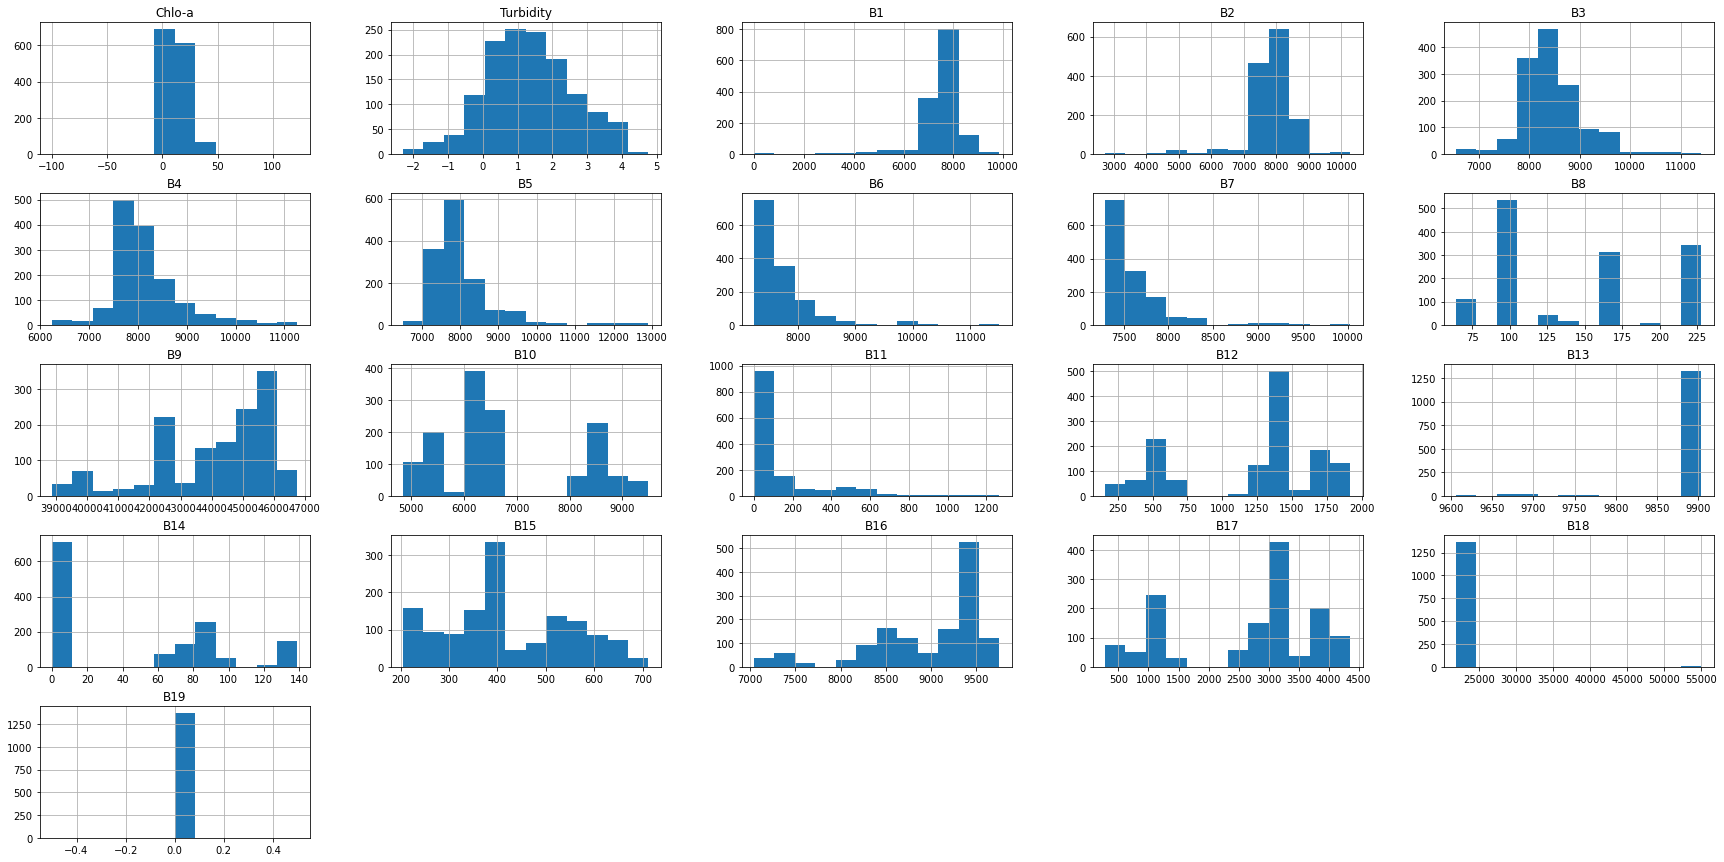

In [14]:
df.hist(figsize = (30,15), bins = 12)

In [15]:
df.describe()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,...,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.0
mean,13.362119,1.328335,7557.744557,7818.526851,8438.772859,8141.233672,8036.430334,7728.995646,7611.920900,142.962264,...,6772.938316,137.928157,1212.065312,9884.046444,45.073295,420.605225,8954.436139,2616.521771,22171.201742,0.0
std,11.063869,1.260003,873.526906,695.603868,618.081259,705.119407,842.533885,514.987624,362.495925,55.912059,...,1287.614842,205.979834,504.551849,39.794653,49.269755,129.737373,639.463081,1171.356627,2372.707727,0.0
min,-99.900000,-2.302585,0.000000,2724.000000,6543.000000,6244.000000,6517.000000,7237.000000,7293.000000,64.000000,...,4840.000000,0.000000,158.000000,9606.000000,0.000000,205.000000,7042.000000,275.000000,21824.000000,0.0
25%,6.200000,0.470004,7312.000000,7551.000000,8073.000000,7729.000000,7572.000000,7435.250000,7403.000000,96.000000,...,6100.000000,21.500000,646.000000,9880.000000,0.000000,336.000000,8463.000000,1283.250000,21952.000000,0.0
50%,11.050000,1.308333,7723.500000,7865.000000,8324.000000,7986.000000,7783.000000,7565.000000,7471.000000,128.000000,...,6370.000000,57.000000,1406.000000,9880.000000,0.000000,395.000000,9227.500000,3023.000000,21952.000000,0.0
75%,19.100000,2.151762,7988.000000,8139.000000,8721.000000,8373.000000,8246.000000,7838.000000,7713.000000,216.000000,...,8233.750000,129.000000,1460.000000,9904.000000,84.000000,531.000000,9432.000000,3187.000000,21952.000000,0.0
max,122.200000,4.760463,9847.000000,10280.000000,11413.000000,11265.000000,12906.000000,11506.000000,10031.000000,228.000000,...,9492.000000,1267.000000,1920.000000,9904.000000,139.000000,712.000000,9756.000000,4364.000000,55052.000000,0.0


In [16]:
df = df.dropna()
df.head()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,6.8,3.653252,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
1,7.8,3.696351,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
2,7.0,3.725693,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
3,6.5,3.747148,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
4,7.1,1.629241,7506.0,8101.0,9326.0,8949.0,9330.0,8644.0,8249.0,224.0,...,5345.0,19.0,1759.0,9880.0,0.0,594.0,9174.0,3964.0,21952.0,0.0


In [17]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
Chlo-a,1.00,-0.08,0.00,-0.07,-0.17,-0.20,-0.05,-0.11,-0.11,0.06,0.37,-0.37,-0.02,0.36,0.03,-0.03,0.13,0.33,0.35,-0.04,nan
Turbidity,-0.08,1.00,0.07,0.23,0.57,0.60,0.20,0.17,0.19,0.14,-0.38,0.29,-0.03,-0.31,-0.33,-0.27,0.09,-0.41,-0.30,-0.02,nan
B1,0.00,0.07,1.00,0.96,0.50,0.45,0.36,0.19,0.13,-0.47,0.08,-0.13,0.06,0.14,-0.12,0.10,-0.09,0.09,0.14,-0.01,nan
B2,-0.07,0.23,0.96,1.00,0.72,0.67,0.53,0.38,0.33,-0.37,-0.02,-0.08,0.04,0.09,-0.23,0.06,-0.02,-0.00,0.09,0.06,nan
B3,-0.17,0.57,0.50,0.72,1.00,0.97,0.69,0.64,0.63,0.02,-0.23,0.08,-0.02,-0.07,-0.44,-0.11,0.17,-0.21,-0.06,0.09,nan
B4,-0.20,0.60,0.45,0.67,0.97,1.00,0.66,0.61,0.61,-0.00,-0.26,0.12,-0.02,-0.11,-0.46,-0.08,0.16,-0.25,-0.10,0.06,nan
B5,-0.05,0.20,0.36,0.53,0.69,0.66,1.00,0.95,0.91,0.15,0.16,-0.35,-0.11,0.37,-0.57,0.12,0.33,0.19,0.38,0.38,nan
B6,-0.11,0.17,0.19,0.38,0.64,0.61,0.95,1.00,0.99,0.21,0.08,-0.26,-0.07,0.28,-0.56,0.12,0.32,0.13,0.29,0.37,nan
B7,-0.11,0.19,0.13,0.33,0.63,0.61,0.91,0.99,1.00,0.26,0.06,-0.23,-0.05,0.25,-0.56,0.09,0.31,0.11,0.26,0.38,nan
B8,0.06,0.14,-0.47,-0.37,0.02,-0.00,0.15,0.21,0.26,1.00,0.00,-0.14,-0.11,0.14,-0.25,-0.29,0.24,0.01,0.14,0.13,nan


In [18]:
df = df.dropna()
df.head()

,Chlo-a,Turbidity,B1,B2,B3,B4,B5,B6,B7,B8,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,6.8,3.653252,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
1,7.8,3.696351,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
2,7.0,3.725693,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
3,6.5,3.747148,8428.0,8775.0,9543.0,9407.0,9227.0,8310.0,8001.0,160.0,...,5356.0,44.0,1756.0,9880.0,0.0,458.0,9142.0,3957.0,21952.0,0.0
4,7.1,1.629241,7506.0,8101.0,9326.0,8949.0,9330.0,8644.0,8249.0,224.0,...,5345.0,19.0,1759.0,9880.0,0.0,594.0,9174.0,3964.0,21952.0,0.0


In [19]:
#drop the columns of the dependent variables to have independent variables
X = df.drop(columns = ["Chlo-a", "Turbidity"])
y = df[["Turbidity"]]
#Y = dc[["Turbidity"]]

In [20]:
rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
rf.fit(X,y)

RandomForestRegressor(n_estimators=300, random_state=42)

In [21]:
rf.feature_importances_

array([0.01929907, 0.01241127, 0.03917335, 0.47697012, 0.02028335,
       0.02102014, 0.03141823, 0.01600876, 0.0131756 , 0.04220684,
       0.02085508, 0.04241571, 0.00830491, 0.00608645, 0.01678447,
       0.01776784, 0.18590048, 0.00991833, 0.        ])

Text(0.5, 0, 'Random Forest Feature Importance')

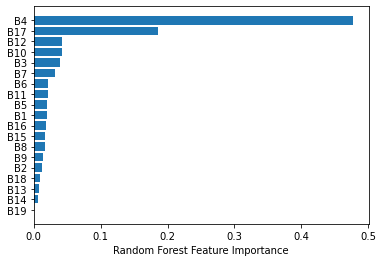

In [22]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [25]:
#drop the columns of the dependent variables and independent variables
X = df.drop(columns = ["Chlo-a", "Turbidity", "B19", "B18", "B15", "B14", "B6", "B14", "B8", "B12",
                       "B11", "B10", "B9", "B1", "B13", "B16", "B17"])
#Including necessary dependent variable
y = df[["Turbidity"]]

In [26]:
corr1 = X.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,B2,B3,B4,B5,B7
B2,1.00,0.72,0.67,0.53,0.33
B3,0.72,1.00,0.97,0.69,0.63
B4,0.67,0.97,1.00,0.66,0.61
B5,0.53,0.69,0.66,1.00,0.91
B7,0.33,0.63,0.61,0.91,1.00


In [27]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1708
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B2      1378 non-null   float64
 1   B3      1378 non-null   float64
 2   B4      1378 non-null   float64
 3   B5      1378 non-null   float64
 4   B7      1378 non-null   float64
dtypes: float64(5)
memory usage: 64.6 KB


In [29]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1708
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  1378 non-null   float64
dtypes: float64(1)
memory usage: 21.5 KB


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 729 to 1311
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B2      964 non-null    float64
 1   B3      964 non-null    float64
 2   B4      964 non-null    float64
 3   B5      964 non-null    float64
 4   B7      964 non-null    float64
dtypes: float64(5)
memory usage: 45.2 KB


In [32]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 729 to 1311
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  964 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 632 to 1590
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B2      414 non-null    float64
 1   B3      414 non-null    float64
 2   B4      414 non-null    float64
 3   B5      414 non-null    float64
 4   B7      414 non-null    float64
dtypes: float64(5)
memory usage: 19.4 KB


In [34]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 632 to 1590
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  414 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


In [35]:
#calling the model and fitting the data points
#lm = linear_model.LinearRegression()
#lm.fit(X_train,y_train)

LinearRegression()

In [36]:
#import joblib
#joblib.dump(lm, "lm_turb_joblib")

['lm_turb_joblib']

In [37]:
# load, no need to initialize the loaded_rf
loaded_lm = joblib.load("lm_turb_joblib")

In [38]:
y_pred = loaded_lm.predict(X_test)

In [39]:
#To retrieve the intercept:
print(loaded_lm.intercept_)
#For retrieving the slope:
print(loaded_lm.coef_)

[1.34394872]
[[-0.48660562  0.60927017  0.77121712 -0.07982011 -0.37849988]]


In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 value is:', r2_score(y_test,y_pred))

Mean Absolute Error: 0.6518496941547399
Mean Squared Error: 0.8007799903373712
Root Mean Squared Error: 0.8948631126252614
R^2 value is: 0.5164477493503028


In [41]:
y_pred_train = loaded_lm.predict(X_train)

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R^2 value is:', r2_score(y_train,y_pred_train))

Mean Absolute Error: 0.6542463182075788
Mean Squared Error: 0.8147561416568836
Root Mean Squared Error: 0.9026384335141527
R^2 value is: 0.4762114517624143


In [43]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [44]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,1.223775,0.994492
1,2.917771,1.812358
2,3.100092,2.971974
3,-0.356675,0.690306
4,1.098612,0.837259


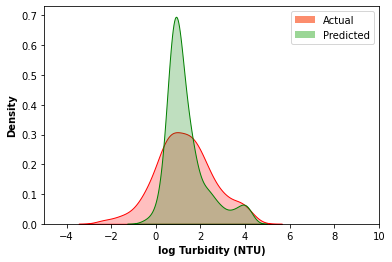

In [45]:
ax = sns.kdeplot(df["Actual"], shade=True, color="r")
ay = sns.kdeplot(df["Predicted"], shade=True, color="g")
ax.set_xlim(-5,10)
ax.set_xlabel("log Turbidity (NTU)", fontweight = 'bold')
ax.set_ylabel("Density", fontweight = 'bold')
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Actual"),
           mpatches.Patch(facecolor=plt.cm.Greens(100), label="Predicted")]
plt.legend(handles=handles)
plt.show()
#plt.savefig("turb_mod.tif", dpi = 300)

In [46]:
#cls = RandomForestRegressor(criterion='mse')   

#cls.fit(X_train, y_train)#We are training the model with RBF'ed data

RandomForestRegressor(criterion='mse')

In [47]:
#joblib.dump(cls, "turb_joblib")

['turb_joblib']

In [48]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("turb_joblib")

In [49]:
rf_pred = loaded_rf.predict(X_test)
rf_pred[0:5]

array([ 1.07059166,  2.42247304,  3.07276944, -0.51613425,  1.11100202])

In [50]:
print("MSE",mean_squared_error(y_test,rf_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R^2 value is:', r2_score(y_test,rf_pred))

MSE 0.294306519012981
RMSE 0.5425002479381746
R^2 value is: 0.8222825478073595


In [51]:
rf_pred_train = loaded_rf.predict(X_train)
rf_pred_train

array([ 2.15727046,  1.63234047,  1.34568925,  2.05365456,  2.61531576,
        1.56512949,  1.75731427,  3.18566666, -0.51613425,  0.31288493,
        1.17333539,  0.39882111,  1.92760245,  3.0207567 ,  3.04169069,
        2.05365456,  0.10220142,  0.20974478,  3.26644153,  1.75731427,
        1.425289  ,  1.45457192,  2.90228545,  1.25063   , -0.0161856 ,
       -0.96384633,  2.29355721,  1.60054596,  1.07204586,  0.1766691 ,
        2.60491535,  0.22071575,  1.62786604,  3.83917034,  0.2165438 ,
       -0.11317502,  1.63234047,  1.75731427,  0.48237569,  2.39921422,
       -0.45202805,  1.4881205 ,  0.2422697 ,  1.45394474,  2.39921422,
        0.1766691 ,  0.20974478,  2.15727046,  2.39921422,  2.95491028,
        2.98043464,  1.404805  ,  1.82940775,  4.15293039,  1.45457192,
        1.45420353, -0.26567814,  1.45457192,  0.1766691 ,  1.93731164,
        2.55483026,  0.03663941,  1.15685619,  3.0207567 ,  1.11100202,
        0.44415013,  2.55525771,  1.11100202, -0.41896679,  1.07

In [52]:
print(mean_squared_error(y_train,rf_pred_train))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_train,rf_pred_train)))
print('R^2 value is:', r2_score(y_train,rf_pred_train))

0.19513295984405302
RMSE 0.4417385650405147
R^2 value is: 0.8745533730593682


In [ ]:
# #create a max_depth parameter
# max_depth =  [4,5,6,7,8,9,10,11]
# max_features = [4,5,6,7,8]
# min_samples_split = [2,4,5,10]
# min_samples_leaf = [1,5,10,15]

# #create a random grid for random search
# random_grid = {'max_depth' : max_depth,
# 'max_features': max_features,
# 'min_samples_split': min_samples_split,
# 'min_samples_leaf': min_samples_leaf}

# rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
# random_search = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter = 50, cv = 3)
# random_search.fit(X_train, y_train)

# RF = random_search.best_estimator_

# RF.fit(X_train, y_train)

# #predicting a result for test
# y_pred = RF.predict(X_test)

# #predicting a result for train
# y_pred_train = RF.predict(X_train)

<AxesSubplot:title={'center':'Max_Depth Learning Curve'}, xlabel='max_depth'>

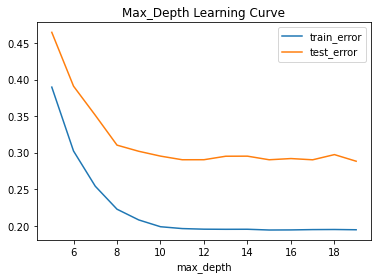

In [53]:
#Hyper paarmeter tuning
#Manually search for best max_depth
# Create empty array to store results
results = []
# Enumerate through different max_depth values and store results
for max_depth in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]:
    RF = RandomForestRegressor(max_depth = max_depth,n_jobs = -1)
    RF.fit(X_train,y_train)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

# Display Results
max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

# Plot Max_Depth Learning Curve
max_depth_lr.plot(title="Max_Depth Learning Curve")

<AxesSubplot:title={'center':'max_features Learning Curve'}, xlabel='max_features'>

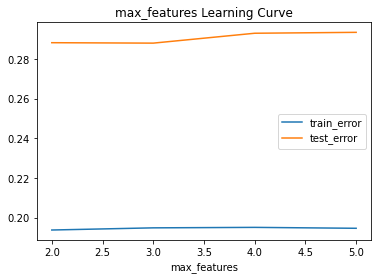

In [55]:
#Manually search for best max_features
results = []
for max_features in [2,3,4,5]:
    RF = RandomForestRegressor(max_features = max_features, max_depth  =16,n_jobs = -1)
    RF.fit(X_train,y_train)
    results.append(
        {
            'max_features': max_features,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

max_features_df = pd.DataFrame(results).set_index('max_features').sort_index()
max_features_df
max_features_df.plot(title="max_features Learning Curve")

<AxesSubplot:title={'center':'min_samples_split-Learning Curve'}, xlabel='min_samples_split'>

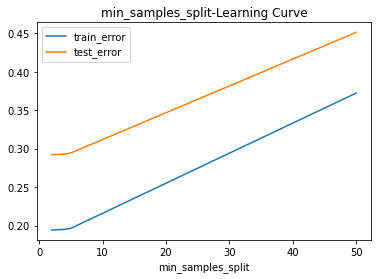

In [56]:
#For Best min_samples_split Parameter

results = []
for min_samples_split in [2,4,5,50]:
    RF = RandomForestRegressor(min_samples_split = min_samples_split, n_estimators = 300, max_depth  =16,max_features = 5,
                               n_jobs = -1 )
    RF.fit(X_train,y_train)
    results.append(
        {
            'min_samples_split': min_samples_split,
            'train_error': metrics.mean_squared_error(y_train, RF.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, RF.predict(X_test))
        })

min_samples_split_df = pd.DataFrame(results).set_index('min_samples_split').sort_index()
min_samples_split_df
min_samples_split_df.plot(title="min_samples_split-Learning Curve")

In [57]:
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 value is:', r2_score(y_test,y_pred))

MSE 0.8007799903373712
RMSE 0.8948631126252614
R^2 value is: 0.5164477493503028


In [58]:
print(mean_squared_error(y_train,y_pred_train))
print('R^2 value is:', r2_score(y_train,y_pred_train))

0.8147561416568836
R^2 value is: 0.4762114517624143


In [59]:
loaded_rf.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=760737459)

In [60]:
feature_list = list(X.columns)
feature_list

['B2', 'B3', 'B4', 'B5', 'B7']

In [61]:
target = list(y.columns)
target

['Turbidity']

In [62]:
fn = feature_list
cn = target

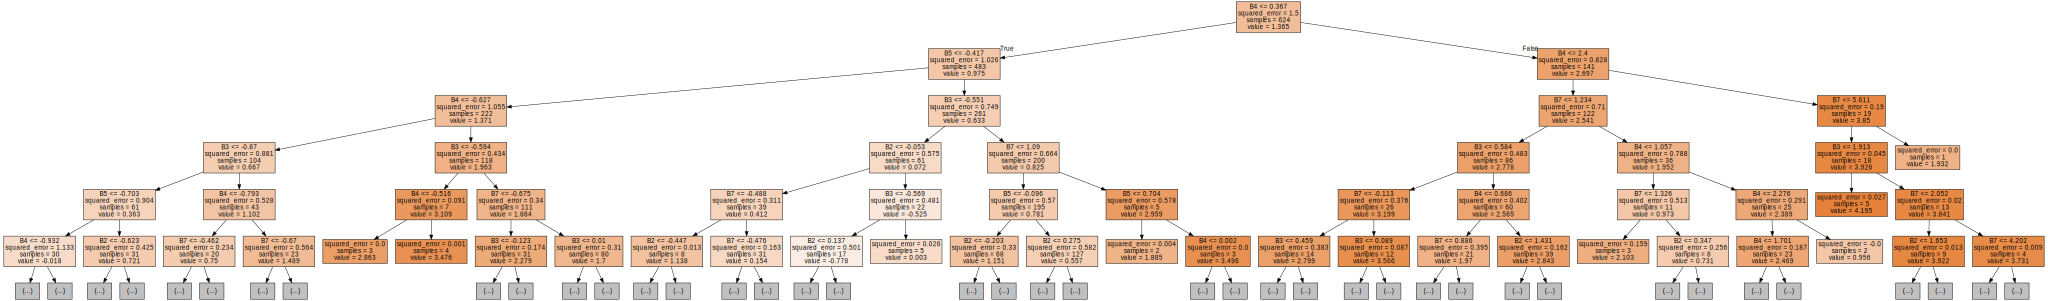

In [63]:
from sklearn import tree
import graphviz
# DOT data
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,10), dpi=300)
dot_data = tree.export_graphviz(loaded_rf.estimators_[0], 
                                out_file=None, 
                                feature_names= fn,  
                                class_names=cn,
                                max_depth=5,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="tif") 
graph

In [64]:
graph.render("turb_main")

'turb_main.tif'

In [65]:
y_test = y_test.flatten()
y_pred = y_pred.flatten()

In [66]:
dpf = pd.DataFrame({'test': y_test, 'pred': y_pred})

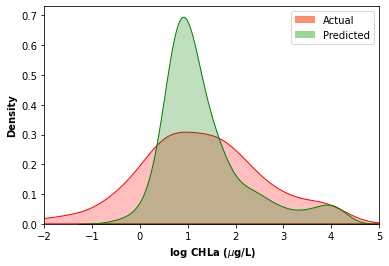

In [67]:
ax = sns.kdeplot(dpf["test"], shade=True, color="r")
ay = sns.kdeplot(dpf["pred"], shade=True, color="g")
ax.set_xlim(-5,35)
ax.set_xlabel(" log CHLa ($\mu$g/L)", fontweight = 'bold')
ax.set_ylabel("Density", fontweight = 'bold')
ax.set_xlim(-2,5)
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Actual"),
           mpatches.Patch(facecolor=plt.cm.Greens(100), label="Predicted")]
plt.legend(handles=handles)
#plt.savefig("chl_mod.tif", dpi = 300)
plt.show()

In [68]:
#clf = SVR()
#clf.fit(X_train, y_train)

SVR()

In [69]:
# save
#joblib.dump(clf, "svr_turb_joblib")

['svr_turb_joblib']

In [70]:
# load, no need to initialize the loaded_rf
loaded_svr = joblib.load("svr_turb_joblib")

In [71]:
sv_pred = loaded_svr.predict(X_test)
sv_pred[0:5]

array([0.72841173, 2.47945889, 3.20795982, 0.45831697, 0.9330664 ])

In [72]:
mse = metrics.mean_squared_error(y_test, sv_pred)
print(np.sqrt(metrics.mean_squared_error(y_test, sv_pred)))
print(mse)
print('R^2 value is:', r2_score(y_test,sv_pred))

0.7830061630332158
0.6130986513479989
R^2 value is: 0.6297794196821562


In [73]:
sv_pred_train = loaded_svr.predict(X_train)
sv_pred_train

array([ 1.34931513,  0.15857463,  1.19286779,  1.40170418,  2.61002406,
        1.18200321,  1.56731711,  3.15750555,  0.45831697,  0.78882595,
        0.94026393,  0.36994913,  1.92454882,  2.18406444,  2.71368852,
        1.40170418, -0.04841024,  0.28204488,  3.08758602,  1.56731711,
        0.58842387,  1.4526489 ,  2.77334131,  1.20826441,  0.30515342,
        0.39281843,  2.11912267,  1.94305305,  1.09726985,  0.30529869,
        1.2408354 ,  0.84361764,  1.75166766,  3.77764203,  0.44307447,
        0.44581273,  0.15857463,  1.56731711,  0.18476332,  1.99453375,
        0.03747545,  1.72424984,  0.68486733,  1.79196205,  1.99453375,
        0.30529869,  0.28204488,  1.34931513,  1.99453375,  2.48536134,
        2.16996354,  1.3814498 ,  1.29844656,  4.16735132,  1.4526489 ,
        0.73751508, -0.26524685,  1.4526489 ,  0.30529869,  1.99496519,
        2.34660176,  0.51484113,  0.7828044 ,  2.18406444,  0.9330664 ,
        0.90397912,  2.62145315,  0.9330664 ,  0.69322001,  0.72

In [74]:
mse = metrics.mean_squared_error(y_train, sv_pred_train)
print(np.sqrt(metrics.mean_squared_error(y_train, sv_pred_train)))
print(mse)
print('R^2 value is:', r2_score(y_train, sv_pred_train))

0.7922066900398694
0.6275914397439257
R^2 value is: 0.5965354634316553
